In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
univ_df = pd.read_csv("../data/regional_univariate_data.csv")

univ_df['date'] = pd.to_datetime(univ_df['date'])
univ_df.head()

,date,region,new_confirmed
0,2020-01-22,East North Central,0.0
1,2020-01-22,East South Central,0.0
2,2020-01-22,Mid-Atlantic,0.0
3,2020-01-22,Mountain,0.0
4,2020-01-22,New England,0.0


# Cases Over Time
## (unrelated to correlation analysis, skip to see ACF/PACFs)

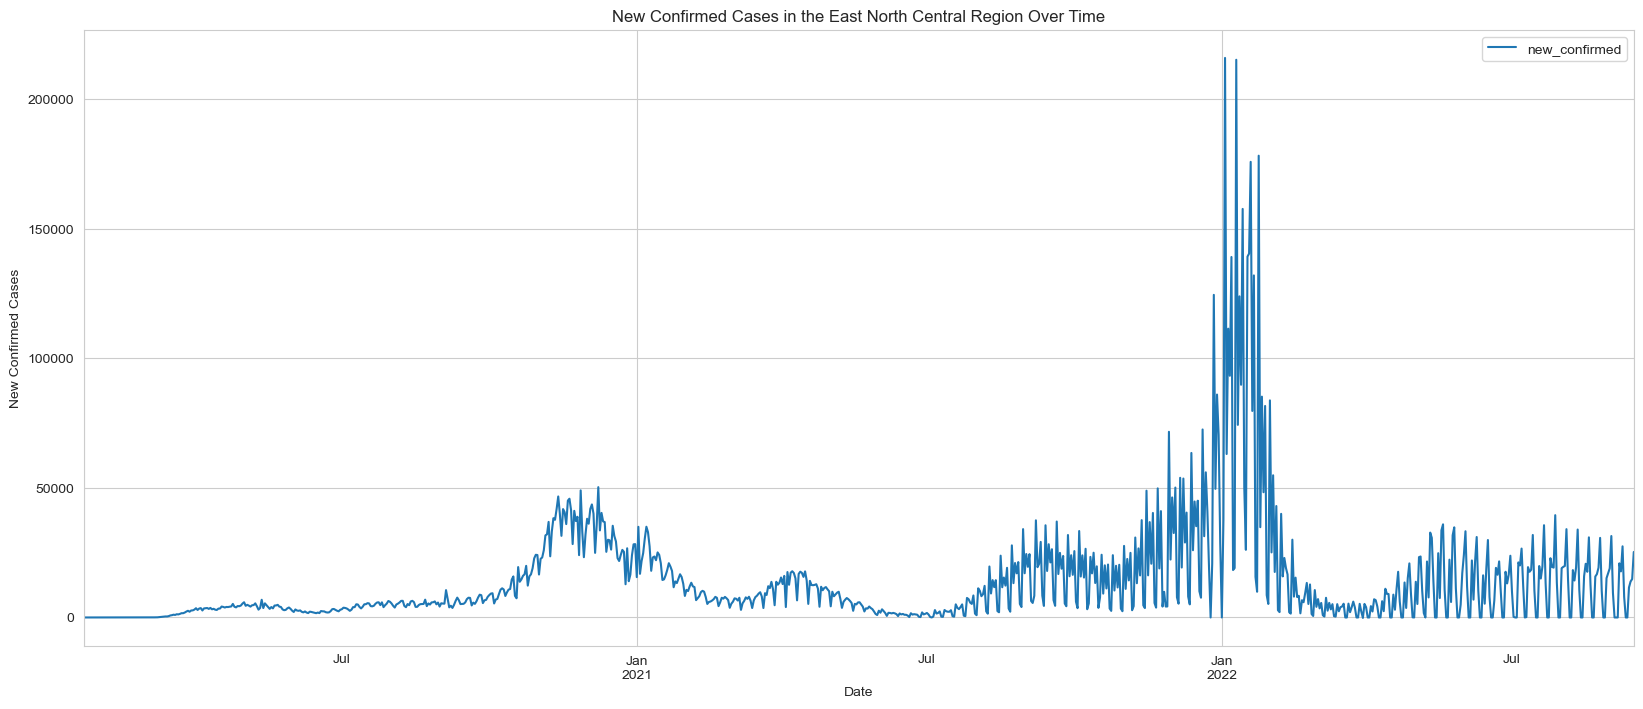

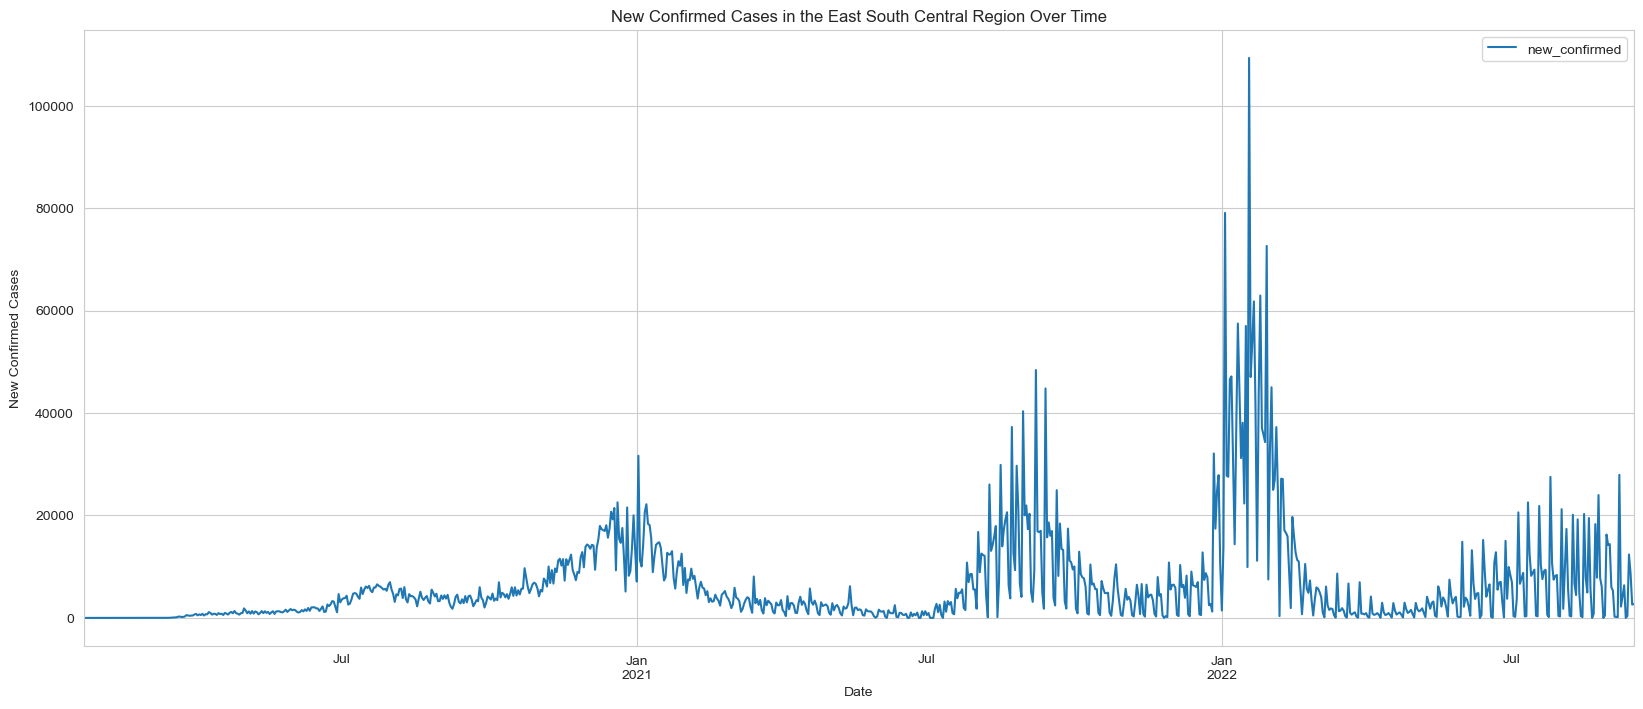

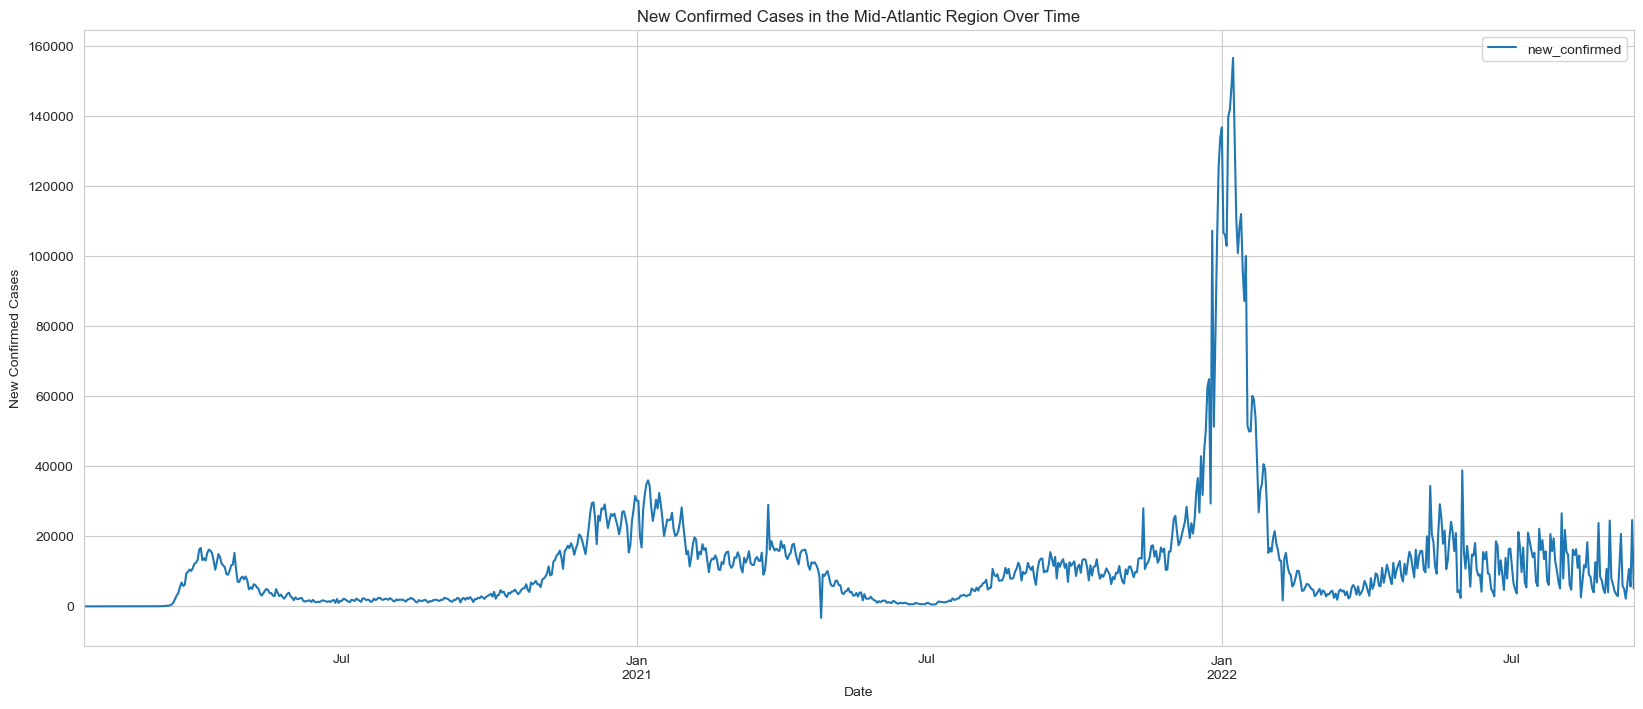

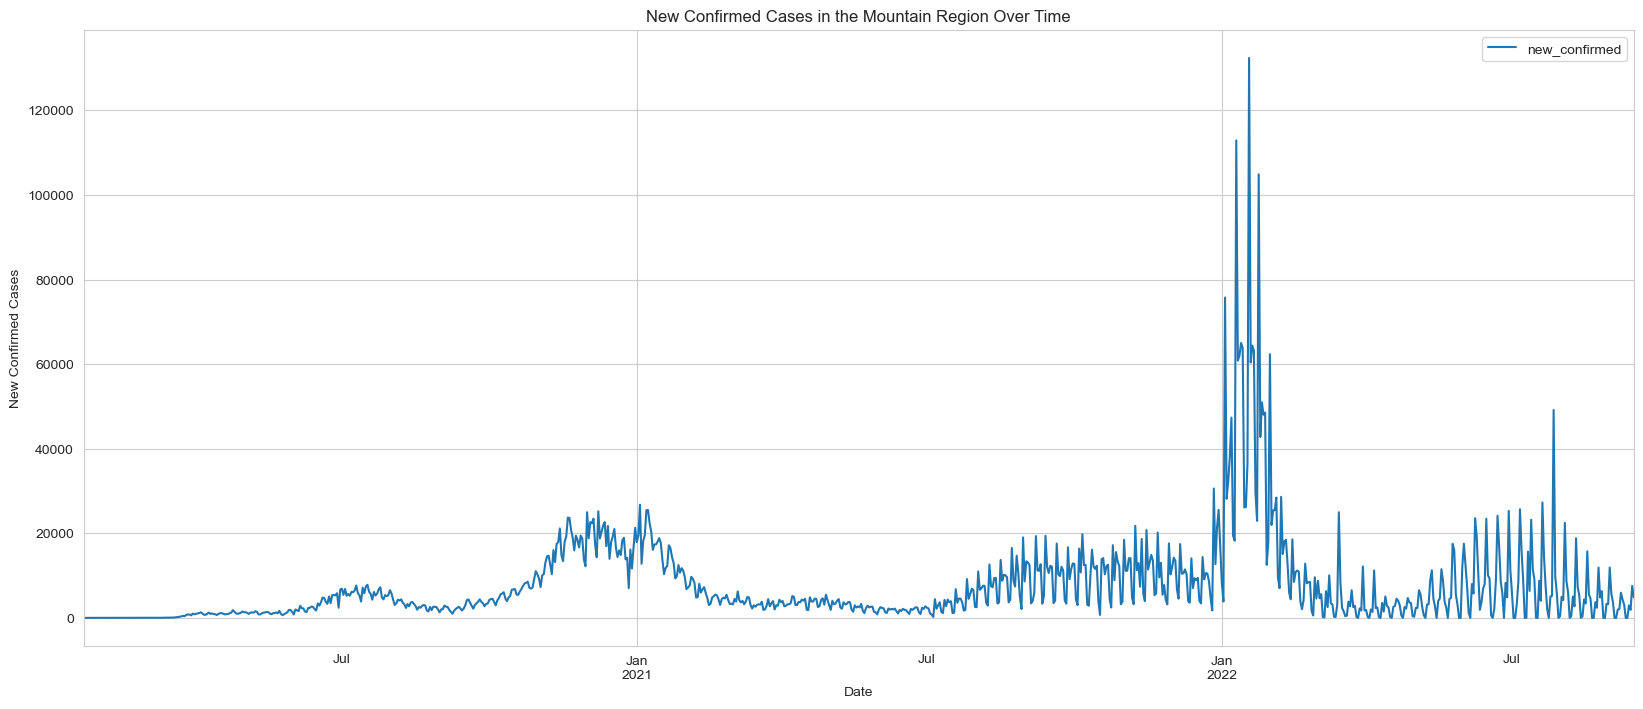

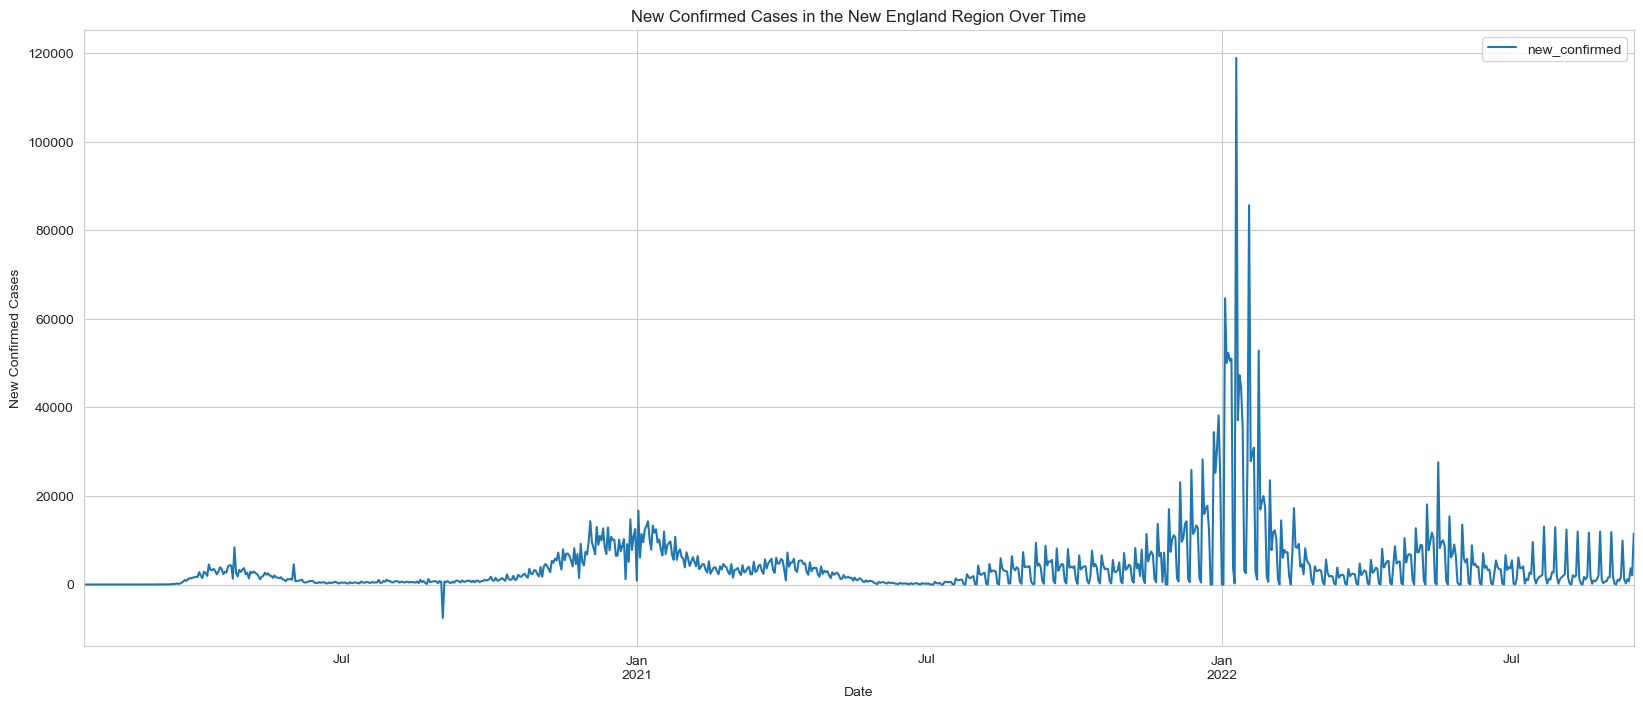

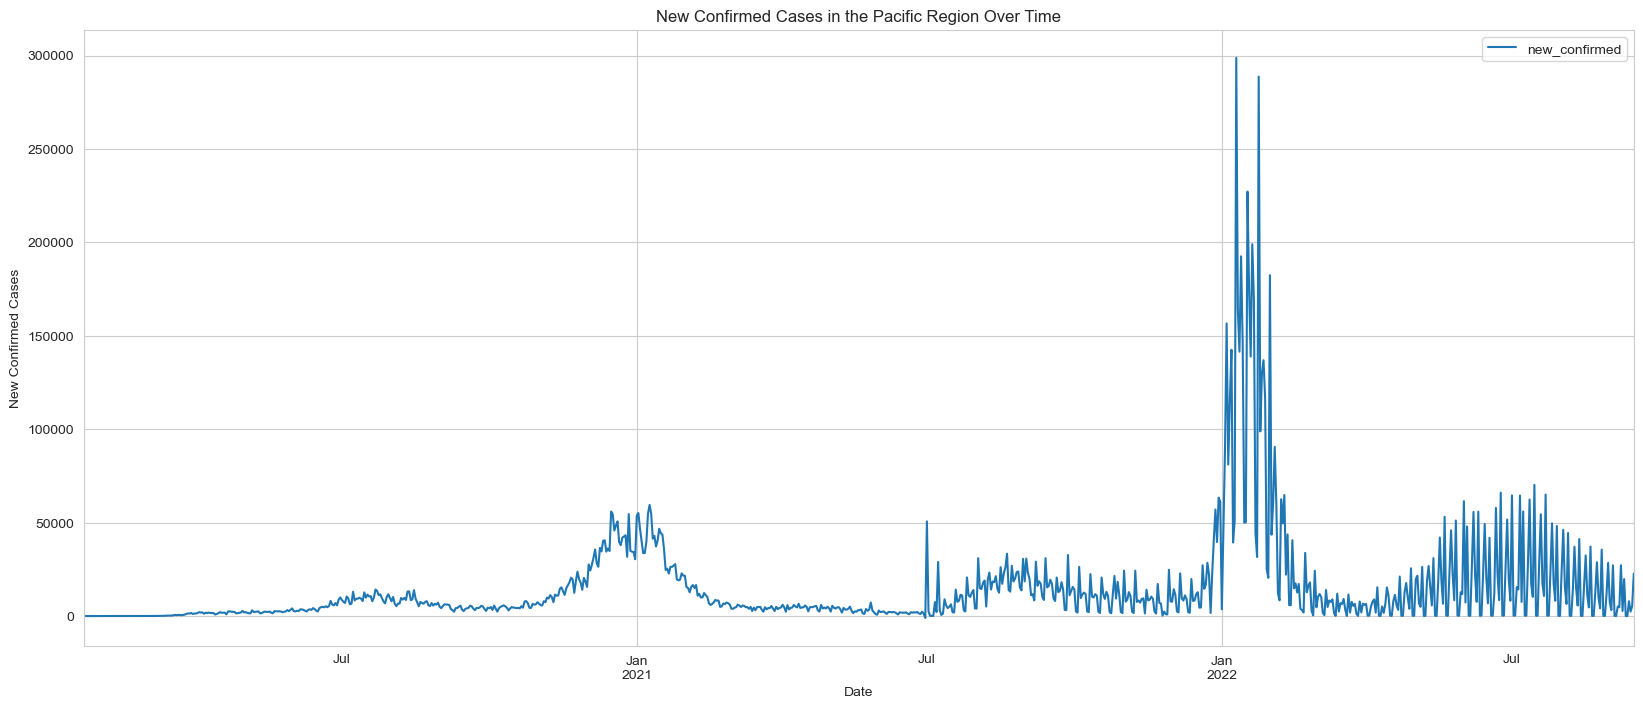

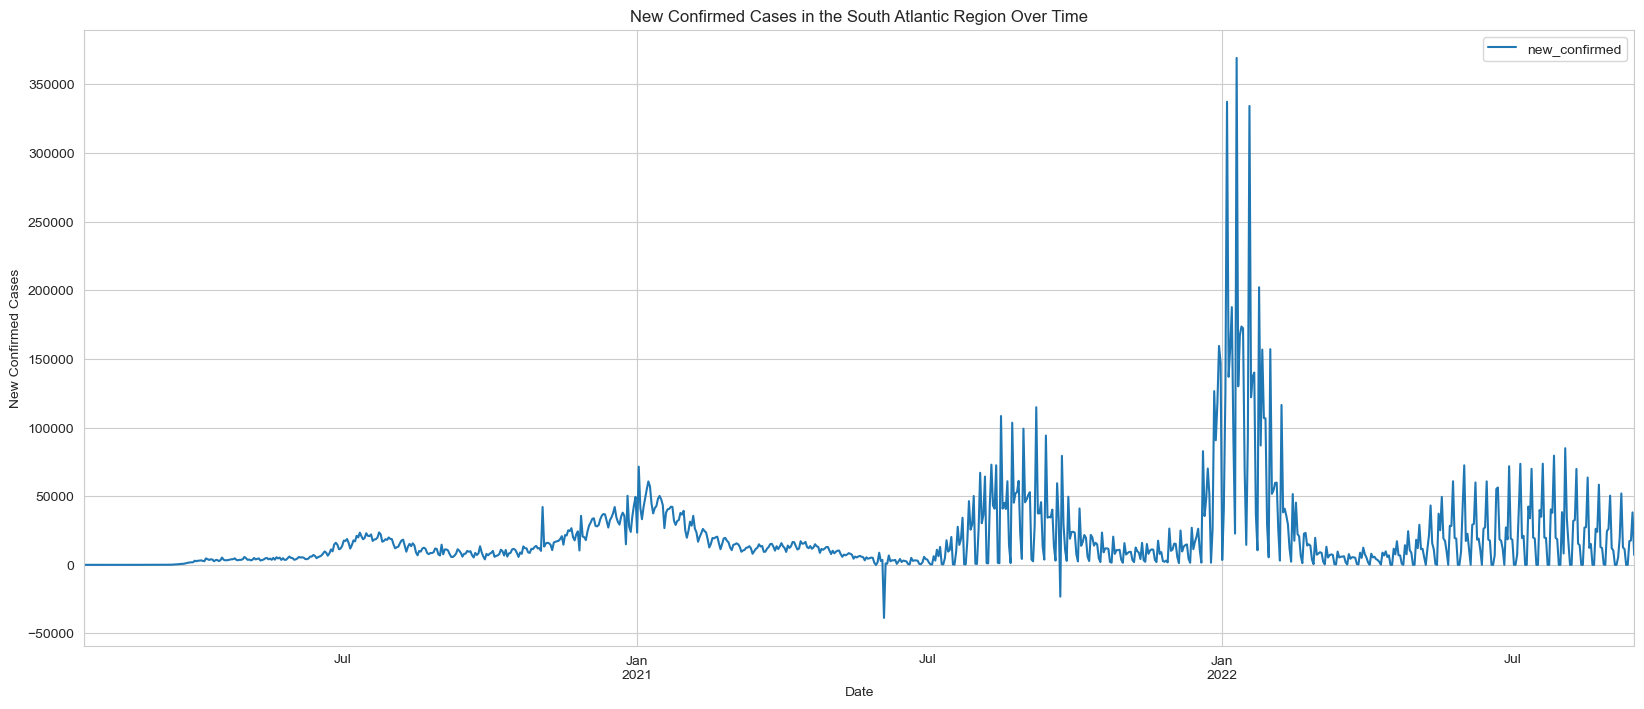

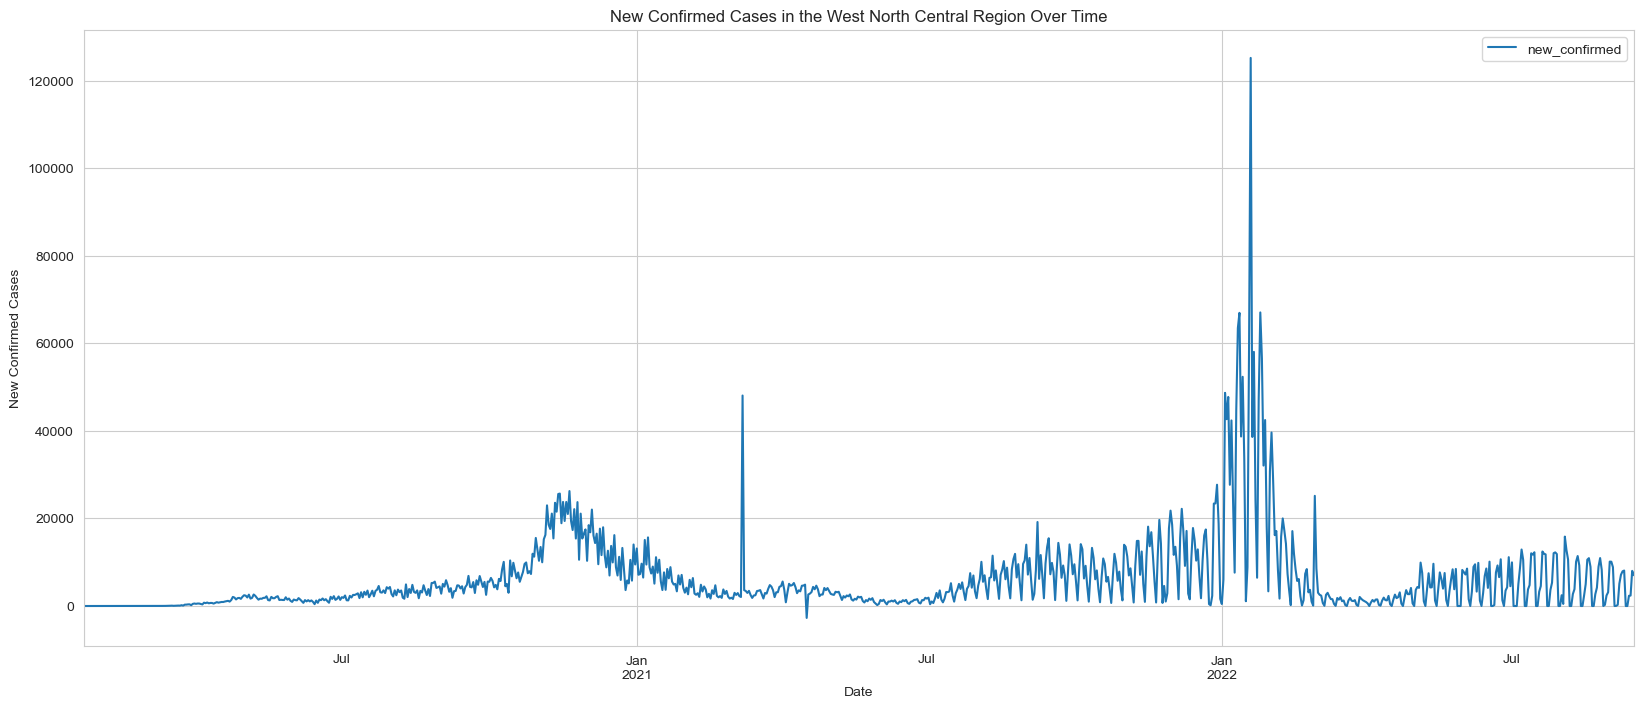

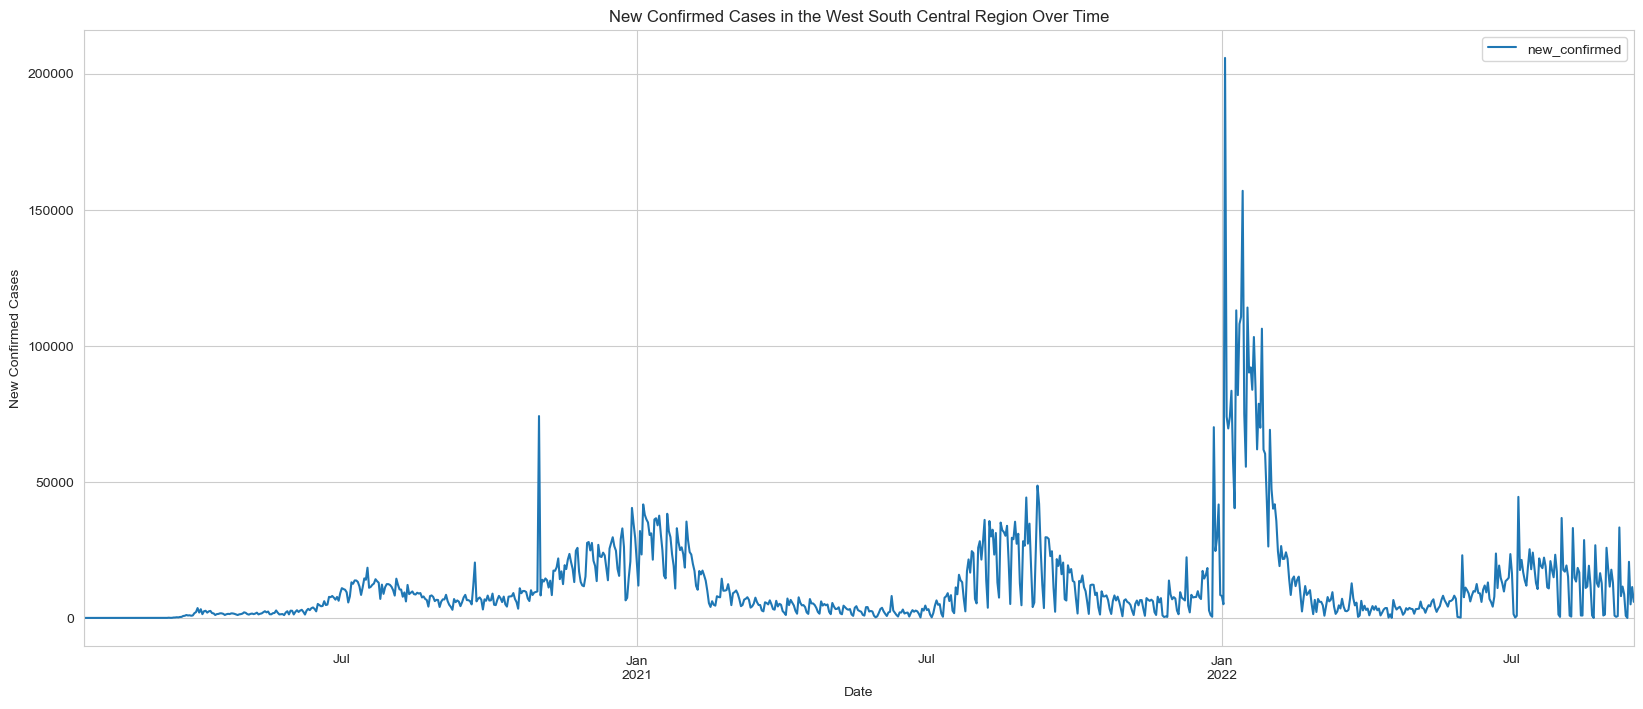

In [3]:
sns.set_style("whitegrid")

regions = univ_df['region'].unique()

for region in regions:
  
    region_data = univ_df[univ_df['region'] == region]
    region_data = region_data.drop(columns = 'region', axis = 1)
    region_data['date'] = pd.to_datetime(region_data['date'])
    region_data.set_index('date', inplace=True)

    plt.rcParams['figure.figsize'] = [20, 8]
    region_data.plot(title='New Confirmed Cases in the ' + region + ' Region Over Time')
    plt.xlabel('Date')
    plt.ylabel('New Confirmed Cases')
    plt.show()

# ACF/PACF Nationally, New Cases

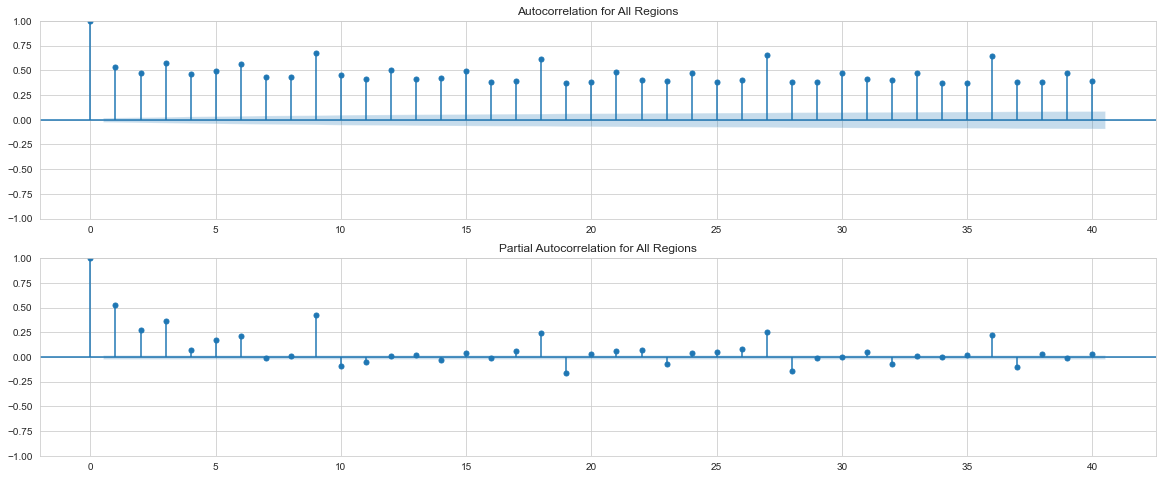

In [11]:
all_regions_data = univ_df.drop(columns = 'region', axis = 1)
all_regions_data['date'] = pd.to_datetime(all_regions_data['date'])
all_regions_data.set_index('date', inplace=True)
fig, ax = plt.subplots(2, figsize=(20, 8))
sm.graphics.tsa.plot_acf(all_regions_data, lags=40, ax=ax[0], title= "Autocorrelation for All Regions")
sm.graphics.tsa.plot_pacf(all_regions_data, lags=40, ax=ax[1], title= "Partial Autocorrelation for All Regions")
plt.show()

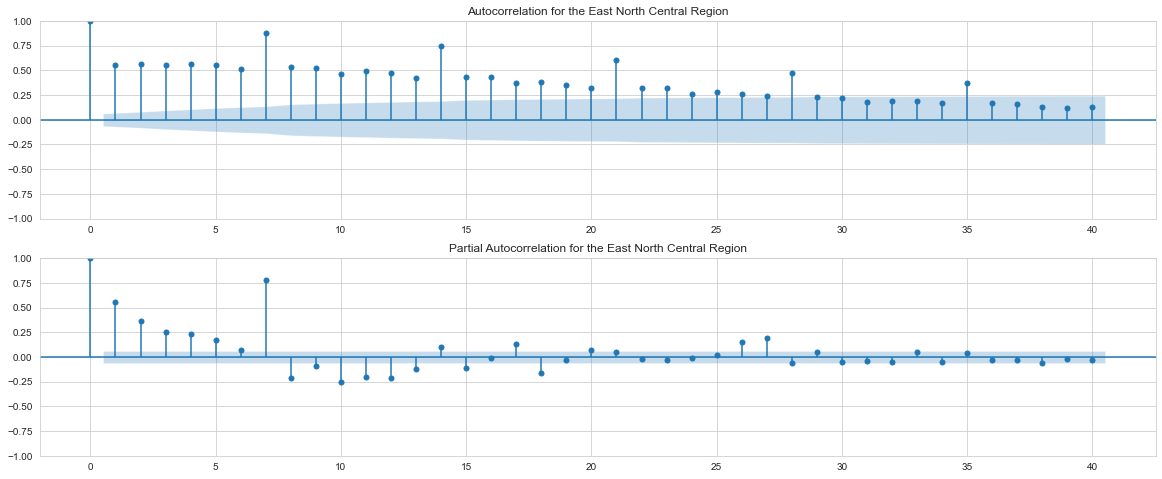

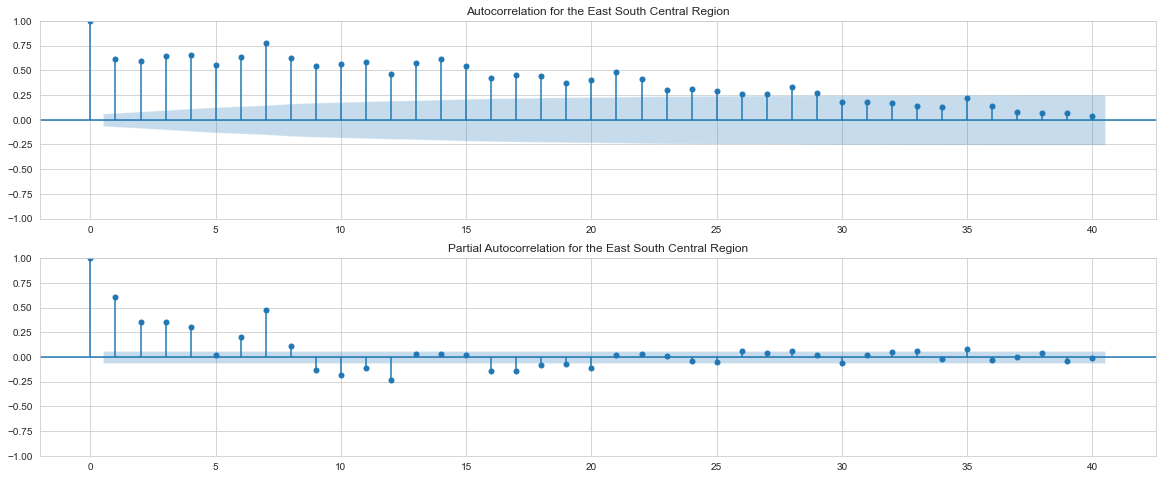

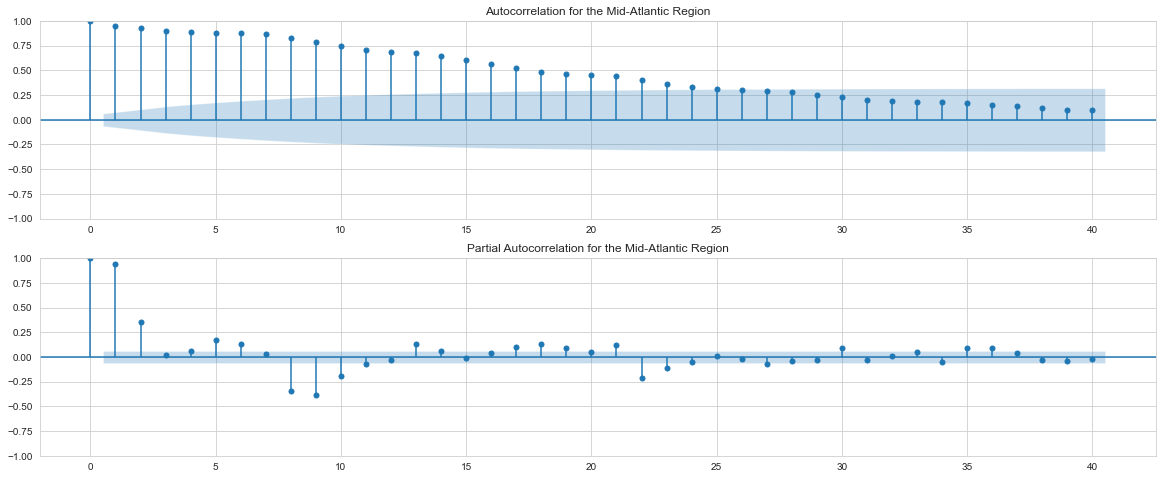

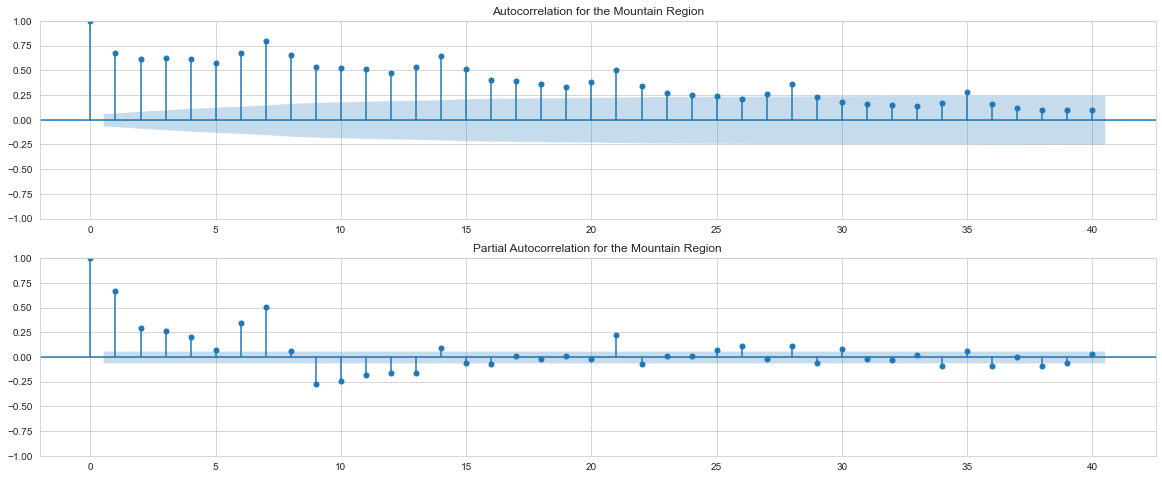

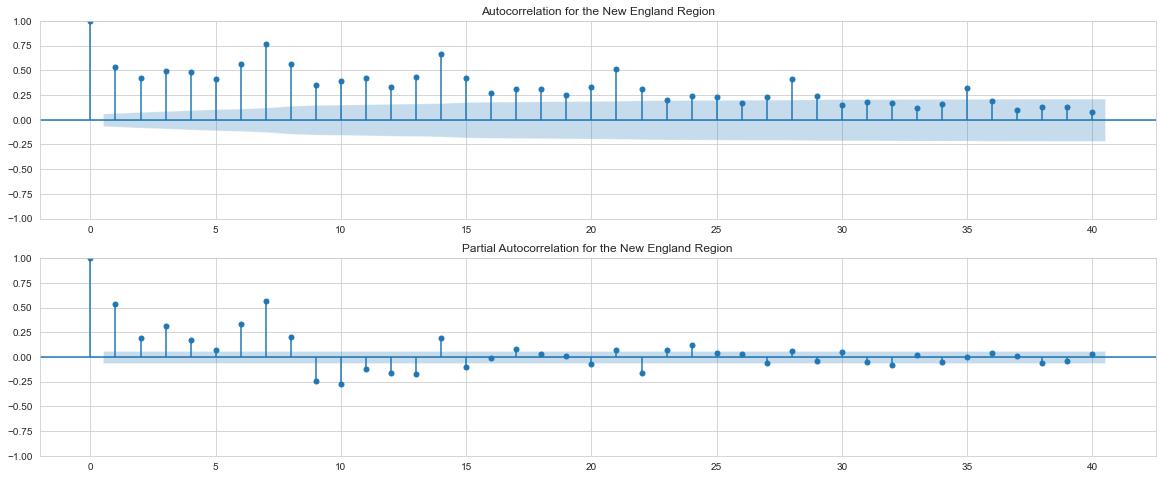

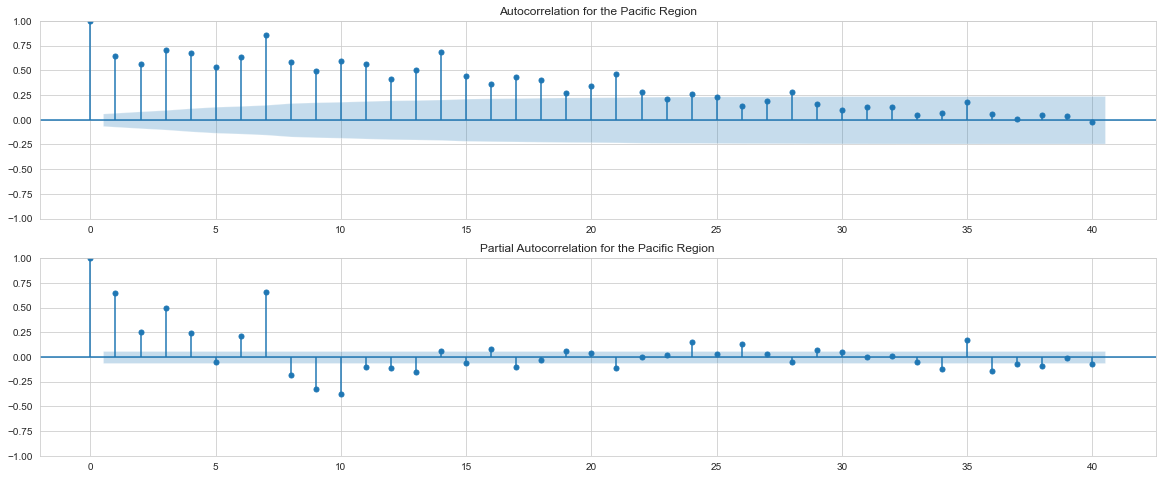

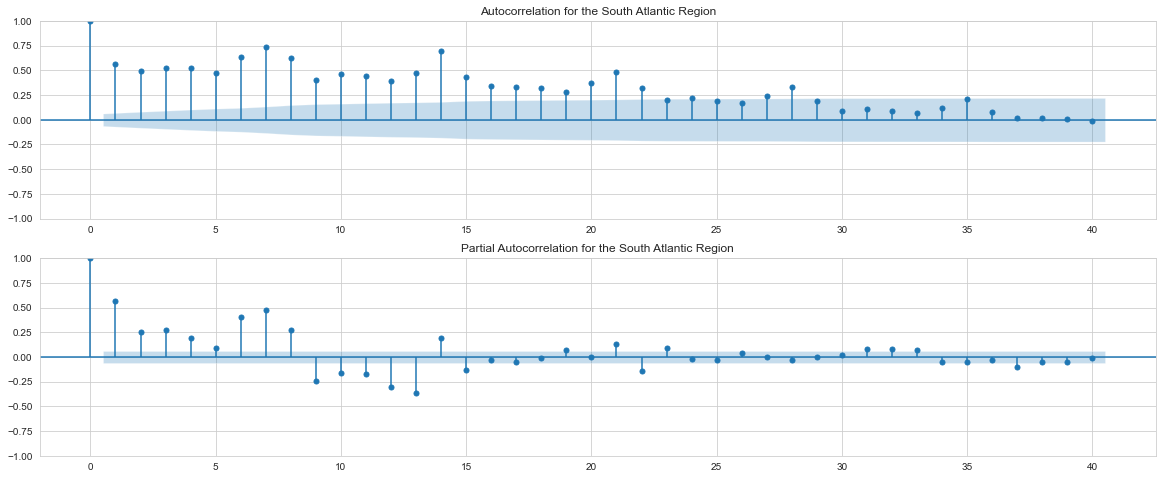

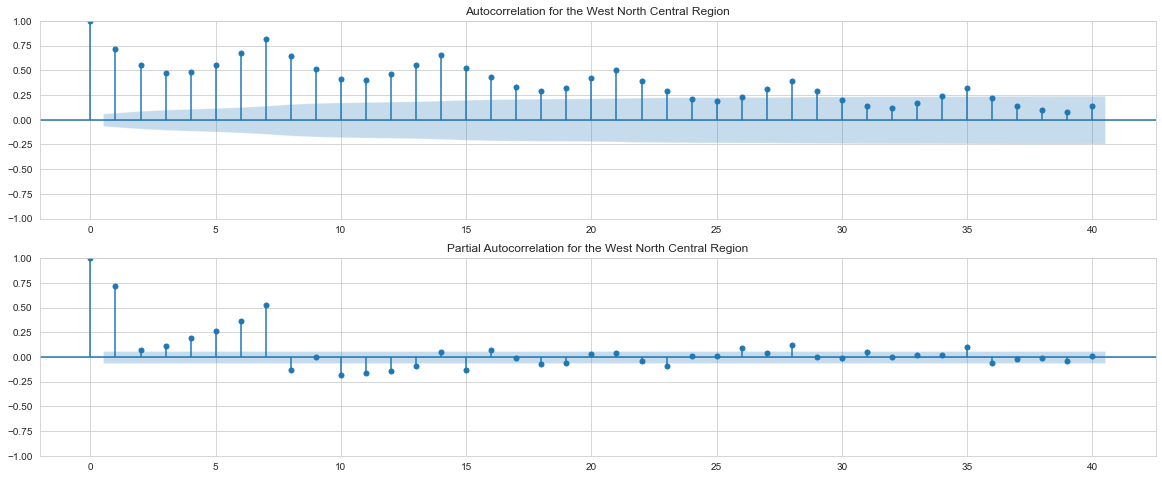

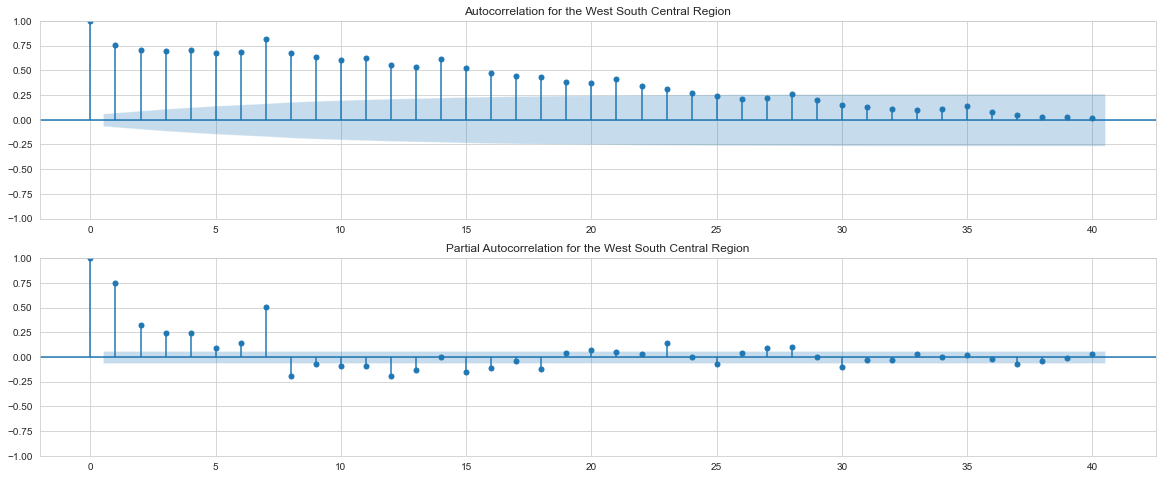

In [12]:
for region in regions:
    region_data = univ_df[univ_df['region'] == region]
    region_data = region_data.drop(columns = 'region', axis = 1)
    region_data['date'] = pd.to_datetime(region_data['date'])
    region_data.set_index('date', inplace=True)
    fig, ax = plt.subplots(2, figsize=(20, 8))
    sm.graphics.tsa.plot_acf(region_data, lags=40, ax=ax[0], title= "Autocorrelation for the " + region + " Region")
    sm.graphics.tsa.plot_pacf(region_data, lags=40, ax=ax[1], title= "Partial Autocorrelation for the " + region + " Region")
    plt.show()